<a href="https://colab.research.google.com/github/gsc16/MachineLearning/blob/master/hw3/hw3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1

I have run the model with learning rate 0.00005 and I could achieve a maximum validation accuracy of 90.70%, after running for 100 epochs. After adding drop out of 0.25, I could achieve a maximum validation accuracy of 91.10% after running for 100 epochs. It reduced the overfitting a bit. But, that is not too significant.

### Downloading data

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-17 13:33:48--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   125MB/s    in 0.5s    

2019-04-17 13:33:49 (125 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



### Extracting images and splitting data into training and test data sets

In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### Building the model with VGG19 convolutional base

#### Loading VGG19 convolutional base and freezing it

In [4]:
from keras.applications import VGG19

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224, 224, 3))

conv_base.trainable = False
for layer in conv_base.layers:
  layer.trainable = False

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 1s 0us/step


#### Adding densely connected layers to the convolutional base

In [5]:
from keras import layers
from keras import models
from keras import optimizers

visualization_layer = conv_base.get_layer('block5_pool').output
temp = layers.Flatten()(visualization_layer)
temp = layers.Dense(256, activation='relu')(temp)
# no dropout
temp = layers.Dense(1, activation='sigmoid')(temp)

model = models.Model(conv_base.input,temp)
model.summary()

for l in conv_base.layers:
  print(l.name),
  print(l.trainable)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### Training the model

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=0.00005), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 54s 537ms/step - loss: 0.5455 - acc: 0.7225 - val_loss: 0.3375 - val_acc: 0.8560
Epoch 2/100
100/100 [==============================] - 47s 468ms/step - loss: 0.3820 - acc: 0.8275 - val_loss: 0.2723 - val_acc: 0.8940
Epoch 3/100
100/100 [==============================] - 47s 469ms/step - loss: 0.3381 - acc: 0.8510 - val_loss: 0.2838 - val_acc: 0.8850
Epoch 4/100
100/100 [==============================] - 47s 467ms/step - loss: 0.2969 - acc: 0.8755 - val_loss: 0.2338 - val_acc: 0.9020
Epoch 5/100
100/100 [==============================] - 48s 479ms/step - loss: 0.2794 - acc: 0.8815 - val_loss: 0.2193 - val_acc: 0.9110
Epoch 6/100
100/100 [==============================] - 48s 483ms/step - loss: 0.2763 - acc: 0.8810 - val_loss: 0.2147 - val_acc: 0.9090
Epoch 7/100
100/100 [==============================]

### Displaying loss and accuracy during training

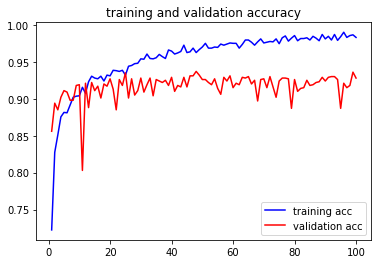

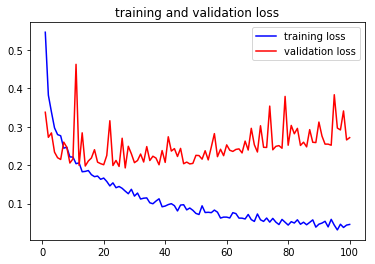

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'b', label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

## Problem 2

With learning rate of 0.00001 after fine tuning, I could achieve a maximum accuracy fo 95.40%. After adding drop out of 0.25, I could get a maximum validation accuracy of 95.20%, which is almost same as without dropout. But, overfitting reduced a bit, though that is not a significant difference.

### Fine Tuning

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

### Training model with fine tuning

In [9]:
# compile model

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 54s 542ms/step - loss: 0.0522 - acc: 0.9815 - val_loss: 0.2737 - val_acc: 0.9270
Epoch 2/100
100/100 [==============================] - 50s 501ms/step - loss: 0.0424 - acc: 0.9820 - val_loss: 0.2206 - val_acc: 0.9340
Epoch 3/100
100/100 [==============================] - 50s 498ms/step - loss: 0.0460 - acc: 0.9830 - val_loss: 0.2665 - val_acc: 0.9240
Epoch 4/100
100/100 [==============================] - 50s 497ms/step - loss: 0.0399 - acc: 0.9855 - val_loss: 0.3071 - val_acc: 0.9280
Epoch 5/100
100/100 [==============================] - 50s 500ms/step - loss: 0.0309 - acc: 0.9905 - val_loss: 0.2937 - val_acc: 0.9350
Epoch 6/100
100/100 [==============================] - 50s 500ms/step - loss: 0.0164 - acc: 0.9945 - val_loss: 0.2495 - val_acc: 0.9310
Epoch 7/100
100/100 [==============================] - 51s 506ms/step - loss: 0.0274 - acc: 0.9910 - val_loss: 0.2300 - val_acc: 0.9430
Epoch 8/100
100/100 [===========================

### Displaying training and validation curves with fine tuning

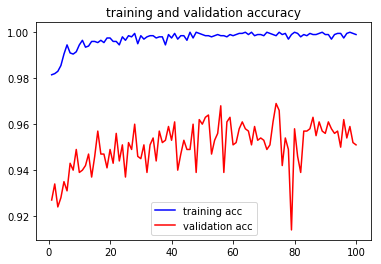

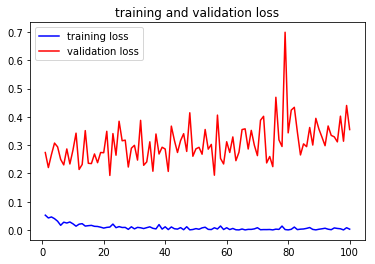

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'b', label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

### Evaluating on the Validation dataset

In [11]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.2938657528563253
Validation accuracy: 0.9589999938011169


### Saving the model

In [0]:
model_fname = 'cats_and_dogs_small_4.h5' 
model.save(model_fname)

## Problem 3

I have used the model that is trained in problem 2 to generate heatmaps for few random dog and cat images.

In [0]:
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras import backend as K

In [0]:

def show_superimposed_image(img_path, heatmap):

  img = cv2.imread(img_path)
  # resize the heatmap to be the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = np.uint8(255 * heatmap)

  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = heatmap * 0.4 + img

  cv2_imshow(superimposed_img)
  
def process_image(img_path, idx=0):
  img = image.load_img(img_path, target_size=(224, 224))

  plt.imshow(img)
  plt.grid(None)
  plt.show()
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  
  class_index = np.argsort(preds[0])[-(1+idx)]
  
  class_output = model.output[:, class_index]
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]

  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  plt.matshow(heatmap)
  plt.grid(None)
  plt.show()
  
  show_superimposed_image(img_path, heatmap)

### Displaying heatmaps for cats

In [15]:
!ls /tmp/cats_and_dogs_filtered/validation/cats | head -20

cat.2000.jpg
cat.2001.jpg
cat.2002.jpg
cat.2003.jpg
cat.2004.jpg
cat.2005.jpg
cat.2006.jpg
cat.2007.jpg
cat.2008.jpg
cat.2009.jpg
cat.2010.jpg
cat.2011.jpg
cat.2012.jpg
cat.2013.jpg
cat.2014.jpg
cat.2015.jpg
cat.2016.jpg
cat.2017.jpg
cat.2018.jpg
cat.2019.jpg


In [0]:
last_conv_layer = model.get_layer('block5_conv4')

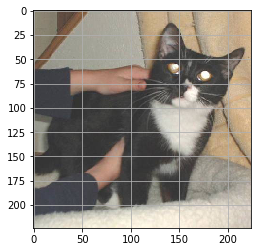

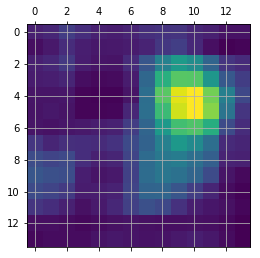

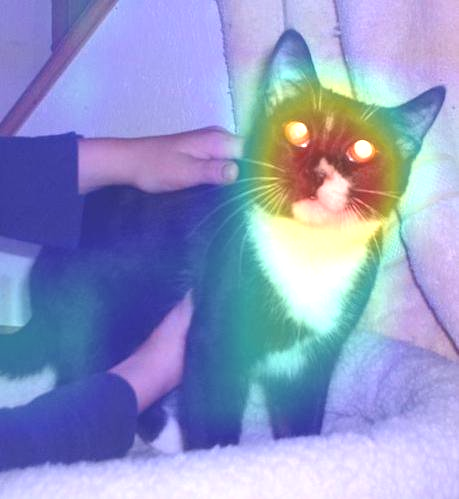

In [17]:
process_image('/tmp/cats_and_dogs_filtered/validation/cats/cat.2000.jpg')

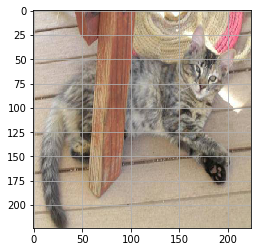

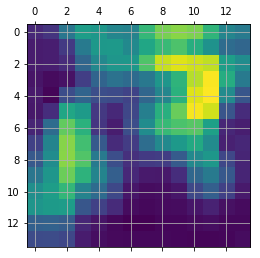

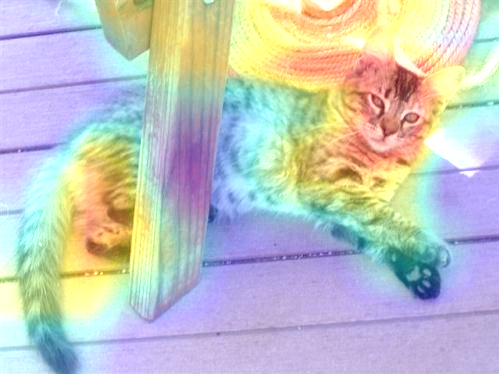

In [18]:
process_image('/tmp/cats_and_dogs_filtered/validation/cats/cat.2010.jpg')

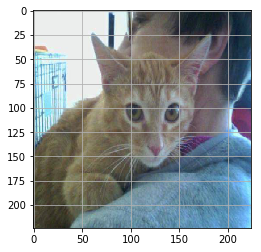

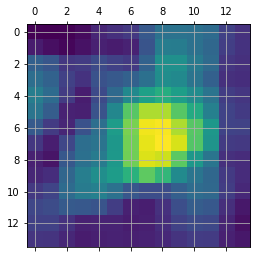

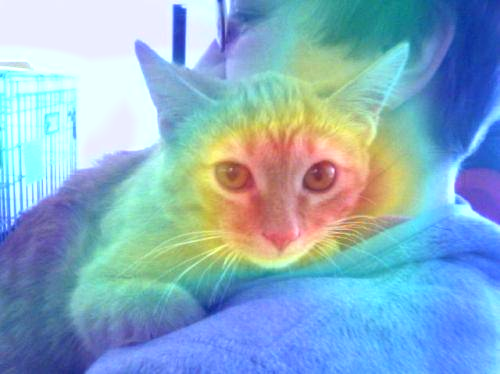

In [19]:
process_image('/tmp/cats_and_dogs_filtered/validation/cats/cat.2019.jpg')

### Displaying heatmaps for dogs

In [20]:
!ls /tmp/cats_and_dogs_filtered/validation/dogs | head -20

dog.2000.jpg
dog.2001.jpg
dog.2002.jpg
dog.2003.jpg
dog.2004.jpg
dog.2005.jpg
dog.2006.jpg
dog.2007.jpg
dog.2008.jpg
dog.2009.jpg
dog.2010.jpg
dog.2011.jpg
dog.2012.jpg
dog.2013.jpg
dog.2014.jpg
dog.2015.jpg
dog.2016.jpg
dog.2017.jpg
dog.2018.jpg
dog.2019.jpg


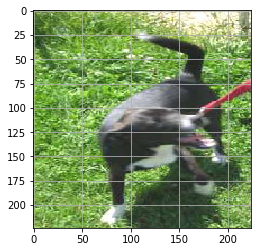

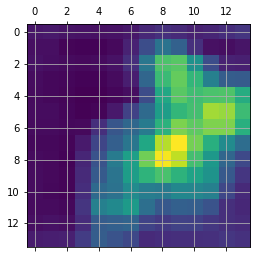

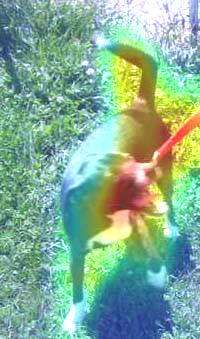

In [21]:
process_image('/tmp/cats_and_dogs_filtered/validation/dogs/dog.2000.jpg')

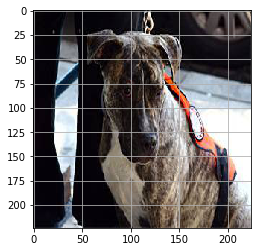

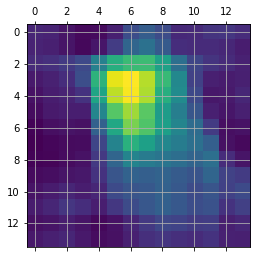

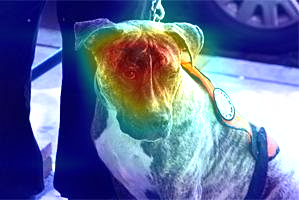

In [22]:
process_image('/tmp/cats_and_dogs_filtered/validation/dogs/dog.2010.jpg')

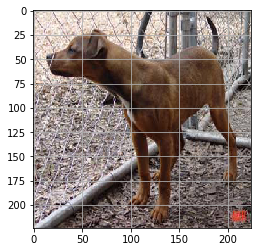

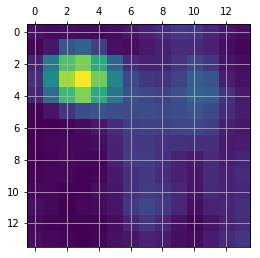

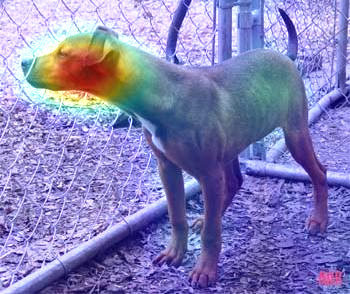

In [23]:
process_image('/tmp/cats_and_dogs_filtered/validation/dogs/dog.2019.jpg')